**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('/content/cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [11]:
params = {'max_depth':[3,6,9,12] , 'n_estimators':[10,50,100,200] }

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [13]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(rf, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=2,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [14]:
cv.fit(X_train,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [15]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.139510,0.003219,0.007528,0.000434,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,15,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.662652,0.007699,0.022346,0.000736,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,12,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
2,1.321613,0.015513,0.039881,0.001001,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,13,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
3,2.625626,0.015557,0.078064,0.002542,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,14,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
4,0.227308,0.001490,0.008544,0.000246,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.752905,0.758904,0.780036,0.774017,0.766466,0.010980,11,0.795911,0.796476,0.793695,0.796446,0.795632,0.001141
5,1.123814,0.008898,0.026644,0.000256,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760089,0.765251,0.788567,0.778669,0.773144,0.011193,8,0.807081,0.805109,0.799176,0.801229,0.803149,0.003113
6,2.238841,0.014114,0.052203,0.002814,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.760964,0.765515,0.788793,0.778936,0.773552,0.011004,7,0.808194,0.806130,0.800846,0.803123,0.804573,0.002808
7,4.471547,0.007929,0.099719,0.002170,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.761481,0.765319,0.787854,0.779745,0.773600,0.010682,6,0.808276,0.806853,0.800682,0.804006,0.804954,0.002906
8,0.314530,0.002143,0.010457,0.000721,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.757853,0.755444,0.781544,0.773823,0.767166,0.010899,10,0.854161,0.856197,0.850317,0.852039,0.853178,0.002211
9,1.563501,0.009531,0.033426,0.000371,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.763956,0.764420,0.786690,0.780255,0.773830,0.009908,4,0.867242,0.871380,0.868213,0.867390,0.868557,0.001672


**Find the best hyperparameters from the cross-validation.**

In [16]:
cv.best_params_

{'max_depth': 9, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [24]:
# Create a 5x5 grid
xx_example, yy_example = np.meshgrid(range(5), range(5))
z_example =(cv_results_df["mean_test_score"].values).reshape(4,4)
z_example

array([[0.75730766, 0.76365051, 0.76281941, 0.76247114],
       [0.7664656 , 0.77314378, 0.77355231, 0.77359992],
       [0.76716589, 0.77383029, 0.77496884, 0.77619851],
       [0.75722825, 0.77157003, 0.77381473, 0.77549938]])

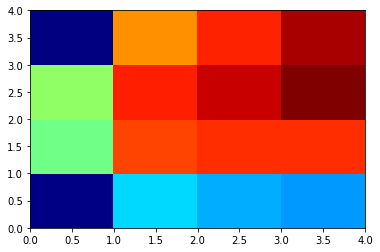

In [26]:
# Set color map to `plt.cm.jet`
# Visualize pcolormesh
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [30]:
# Create a dataframe of the feature names and importance
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv.best_estimator_.feature_importances_
})


In [31]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.437439
0,LIMIT_BAL,0.059961
11,PAY_AMT1,0.059434
12,PAY_AMT2,0.045518
13,PAY_AMT3,0.043299
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
14,PAY_AMT4,0.034321
8,BILL_AMT4,0.034123
